In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random
np.random.seed(42)
random.seed(42)
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("AIML Dataset.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.shape

(6362620, 11)

In [10]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100, 2)

np.float64(0.13)

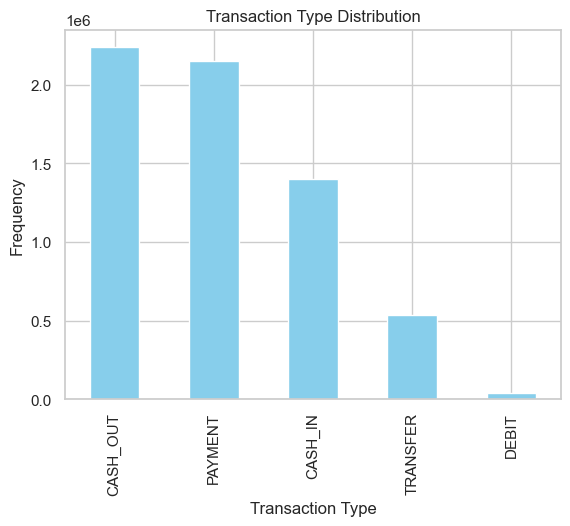

In [11]:
df["type"].value_counts().plot(kind="bar", title="Transaction Type Distribution", color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Frequency")
plt.show()

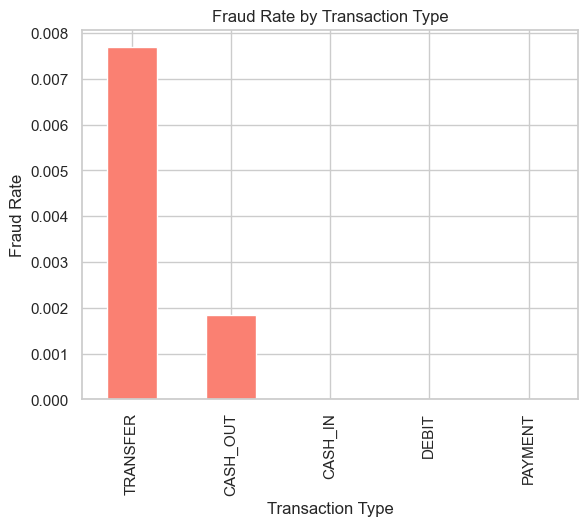

In [12]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Transaction Type", color="salmon")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()

In [13]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

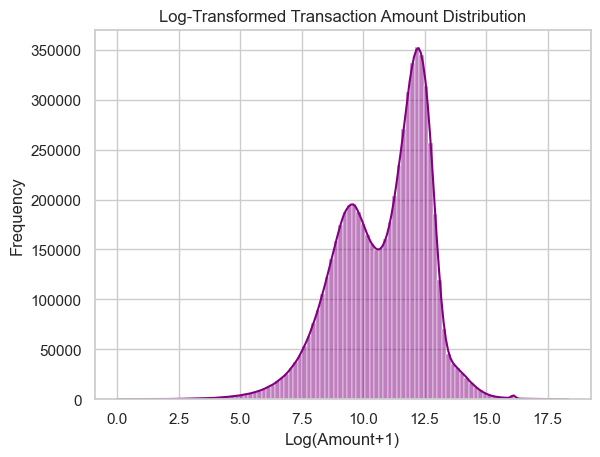

In [14]:
sns.histplot(np.log1p(df["amount"]), bins=100,kde=True,color="purple")
plt.title("Log-Transformed Transaction Amount Distribution")
plt.xlabel("Log(Amount+1)")
plt.ylabel("Frequency")
plt.show()

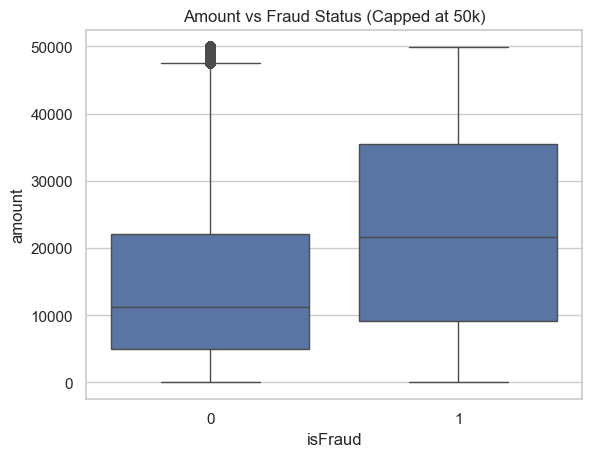

In [15]:
sns.boxplot(data=df[df["amount"]< 50000], x="isFraud", y="amount")
plt.title("Amount vs Fraud Status (Capped at 50k)")
plt.show()

In [16]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]
df["balance_ratio_orig"] = (df["oldbalanceOrg"] + 1) / (df["newbalanceOrig"] + 1)
df["balance_ratio_dest"] = (df["oldbalanceDest"] + 1) / (df["newbalanceDest"] + 1)
df["amount_to_balance_orig"] = df["amount"] / (df["oldbalanceOrg"] + 1)
df["amount_to_balance_dest"] = df["amount"] / (df["oldbalanceDest"] + 1)

In [17]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(1399253)

In [18]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

In [19]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,balance_ratio_orig,balance_ratio_dest,amount_to_balance_orig,amount_to_balance_dest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,1.061384,1.0,0.057834,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1.096168,1.0,0.087731,1864.28


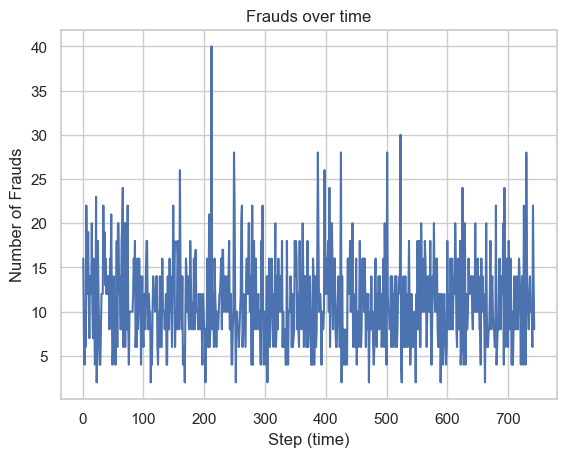

In [20]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label ="Frauds per step")
plt.title("Frauds over time")
plt.xlabel("Step (time)")
plt.ylabel("Number of Frauds")
plt.grid(True)
plt.show()

In [21]:
df.drop(columns="step", inplace=True)

In [22]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,balance_ratio_orig,balance_ratio_dest,amount_to_balance_orig,amount_to_balance_dest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,1.061384,1.0,0.057834,9839.640000
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1.096168,1.0,0.087731,1864.280000
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,182.000000,1.0,0.994505,181.000000
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0,182.000000,21183.0,0.994505,0.008545
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,1.390410,1.0,0.280788,11668.140000


In [23]:
top_senders = df["nameOrig"].value_counts().head(10)

In [24]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [25]:
top_receivers = df["nameDest"].value_counts().head(10)

In [26]:
top_receivers 

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [27]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [28]:
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [29]:
fraud_types = df[df["type"].isin(["CASH_OUT", "TRANSFER"])]

In [30]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

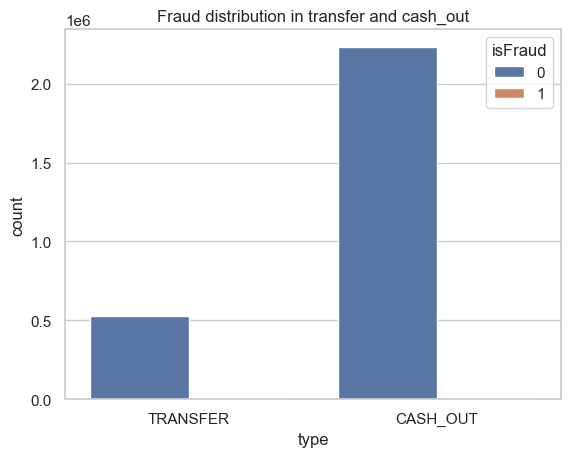

In [31]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud distribution in transfer and cash_out")
plt.show()

In [32]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [33]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


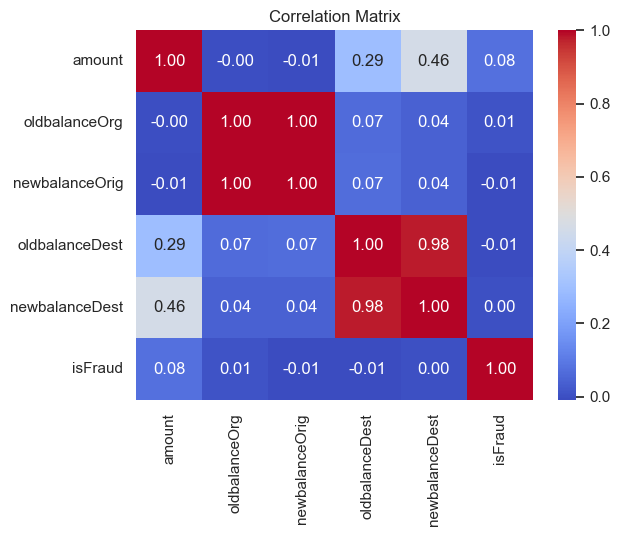

In [34]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [35]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [36]:
len(zero_after_transfer)

1188074

In [37]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,balance_ratio_orig,balance_ratio_dest,amount_to_balance_orig,amount_to_balance_dest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00,182.0,1.000000,0.994505,181.000000
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00,182.0,21183.000000,0.994505,0.008545
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44,15326.0,0.098691,14.950668,45.069618
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00,706.0,22426.000000,304.972096,9.600923
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89,10836.0,0.002305,28.763925,49.726530


In [38]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [40]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,balance_ratio_orig,balance_ratio_dest,amount_to_balance_orig,amount_to_balance_dest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,1.061384,1.0,0.057834,9839.640000
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1.096168,1.0,0.087731,1864.280000
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,182.000000,1.0,0.994505,181.000000
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0,182.000000,21183.0,0.994505,0.008545
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,1.390410,1.0,0.280788,11668.140000


In [41]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)
y = df_model["isFraud"]
x = df_model.drop("isFraud", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [42]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest,balance_ratio_orig,balance_ratio_dest,amount_to_balance_orig,amount_to_balance_dest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0,1.061384,1.0,0.057834,9839.640000
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0,1.096168,1.0,0.087731,1864.280000
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0,182.000000,1.0,0.994505,181.000000
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0,182.000000,21183.0,0.994505,0.008545
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0,1.390410,1.0,0.280788,11668.140000


In [43]:
categorical = ["type"]
numeric = [
    "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest",
    "balanceDiffOrig", "balanceDiffDest",
    "balance_ratio_orig", "balance_ratio_dest",
    "amount_to_balance_orig", "amount_to_balance_dest"
]

In [44]:
y = df_model["isFraud"]
x = df_model.drop("isFraud", axis=1)

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [47]:
pipeline = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [48]:
pipeline.fit(x_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [49]:
y_pred = pipeline.predict(x_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1906322
           1       0.04      0.98      0.08      2464

    accuracy                           0.97   1908786
   macro avg       0.52      0.97      0.53   1908786
weighted avg       1.00      0.97      0.98   1908786



In [51]:
confusion_matrix(y_test, y_pred)

array([[1850939,   55383],
       [     60,    2404]])

In [52]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight}")

scale_pos_weight: 773.7145590537485


In [53]:
xgb_pipeline = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

In [54]:
param_dist = {
    "clf__max_depth": [3, 5, 7, 10],
    "clf__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "clf__n_estimators": [100, 200, 300],
    "clf__subsample": [0.7, 0.8, 1.0]
}

In [55]:
search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_dist,
    n_iter=10,
    scoring="f1",
    cv=3,
    verbose=2,
    n_jobs=1  
)

In [56]:
search.fit(x_train, y_train)
print("Best parameters:", search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=200, clf__subsample=0.7; total time=  23.5s
[CV] END clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=200, clf__subsample=0.7; total time=  23.2s
[CV] END clf__learning_rate=0.05, clf__max_depth=3, clf__n_estimators=200, clf__subsample=0.7; total time=  23.9s
[CV] END clf__learning_rate=0.01, clf__max_depth=10, clf__n_estimators=300, clf__subsample=1.0; total time=  30.5s
[CV] END clf__learning_rate=0.01, clf__max_depth=10, clf__n_estimators=300, clf__subsample=1.0; total time=  29.8s
[CV] END clf__learning_rate=0.01, clf__max_depth=10, clf__n_estimators=300, clf__subsample=1.0; total time=  31.7s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, clf__subsample=0.7; total time=  28.5s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=300, clf__subsample=0.7; total time=  28.2s
[CV] END clf__learning_r

In [57]:
scores = cross_val_score(search.best_estimator_, x_train, y_train, cv=5, scoring="f1")
print("Cross-validated F1 scores:", scores)
print("Mean F1 score:", scores.mean())

Cross-validated F1 scores: [0.81451314 0.76031911 0.81263617 0.98709122 0.82868822]
Mean F1 score: 0.8406495725834462


In [58]:
y_proba = search.best_estimator_.predict_proba(x_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
best_threshold = thresholds[(precisions * recalls).argmax()]
print("Best threshold:", best_threshold)

Best threshold: 0.9987379


In [59]:
y_pred_opt = (y_proba >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.94      0.80      0.86      2464

    accuracy                           1.00   1908786
   macro avg       0.97      0.90      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



In [60]:
y_pred_proba = search.best_estimator_.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9996325553944246


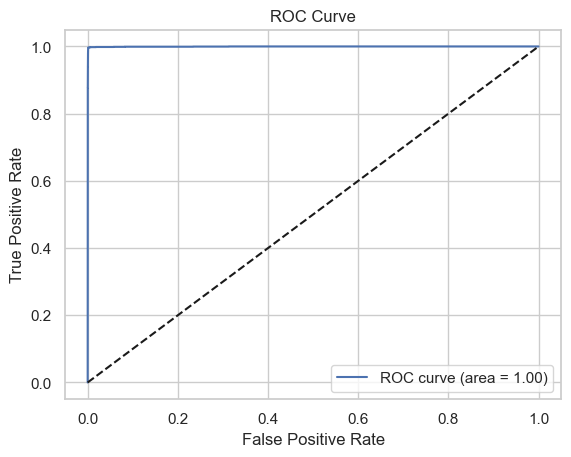

In [61]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [62]:
xgb_model = search.best_estimator_.named_steps["clf"]
importances = xgb_model.feature_importances_
feature_names = search.best_estimator_.named_steps["prep"].get_feature_names_out()

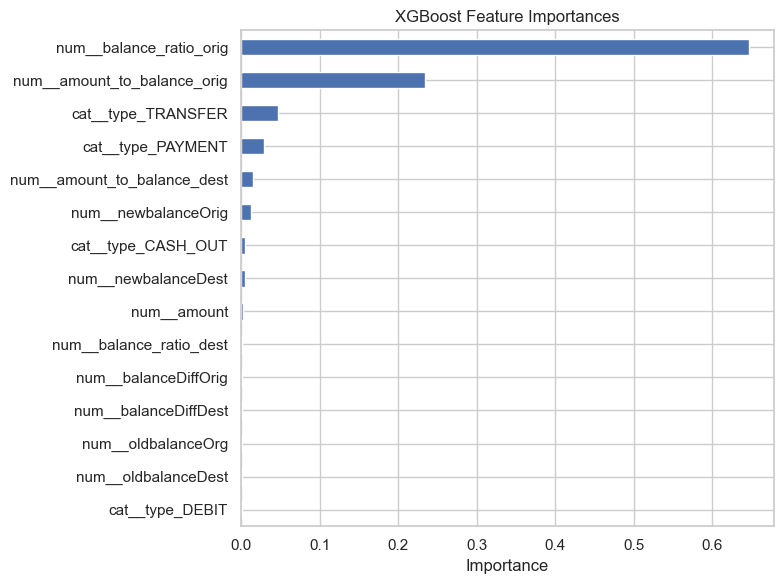

In [63]:
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)
plt.figure(figsize=(8, 6))
feat_imp.plot(kind="barh")
plt.xlabel("Importance")
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()

In [64]:
pipeline.score(x_test, y_test) * 100

97.0953789476662

In [66]:
import joblib
joblib.dump(search.best_estimator_, "fraud_detection_model.joblib")
print("Model saved as fraud_detection_model.joblib")

Model saved as fraud_detection_model.joblib
